In [1]:
# Tensorflow and tf.keras
import tensorflow as tf 
from tensorflow import keras

In [2]:
# helper libraries 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
print(tf.__version__)

1.8.0


## Import the MNIST dataset
Mnist dataset is the hello world of machine learning for computer vision.

NOTE: There is a problem with load_data() function in keras in python3 so better switch to python2 for downloading the datasets. 

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

THe images are 28x28 Numpy arrays with pixel values ranging between 0 -- 255 and the labels are the arrays of integers from zero to 9.
These numbers represent the type of clothes. 
<img src="class.png">

In [4]:
# the class names are put according to the order 
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# it shows that there are 60,000 images in the training dataset.
train_images.shape 

(60000, 28, 28)

In [6]:
# likewise there are 60,000 labels.
len(train_labels)

60000

In [7]:
train_labels.shape

(60000,)

In [8]:
# now the size of test if given by 
len(test_labels)

10000

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


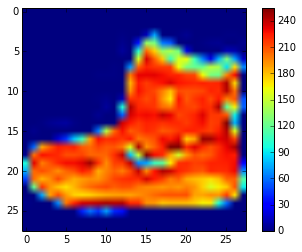

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

Its required to scale the values of the training matrix of 0 to 1 before feeding to the neural network model. lets divide by `255`. 

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

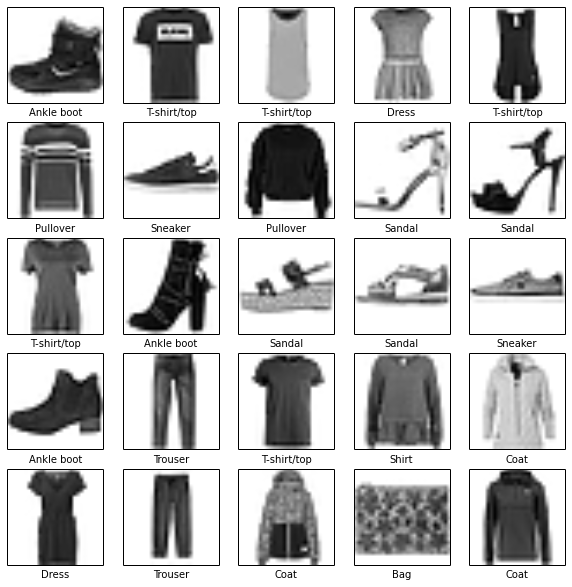

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Model Building. 
Lets build a sequential model using keras. 


In [18]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128,activation=tf.nn.relu),
                         keras.layers.Dense(10,activation=tf.nn.softmax)
                         ])

### Define the loss function 
compile the model 

In [19]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Training the model 


In [20]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.5014 - acc: 0.8231
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.3778 - acc: 0.8635
Epoch 3/5
60000/60000 [==============================] - 5s 76us/step - loss: 0.3361 - acc: 0.8770
Epoch 4/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.3121 - acc: 0.8849
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2948 - acc: 0.8904


Model testing and accuracy

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 38us/step
('Test accuracy:', 0.8595)


In [23]:
## predictions
predictions = model.predict(test_images)

In [24]:
predictions[0]

array([3.47245560e-07, 1.79981086e-10, 1.30603994e-09, 1.83635850e-11,
       1.28053035e-08, 7.29602762e-03, 2.44828904e-08, 1.35897903e-03,
       2.31918557e-06, 9.91342247e-01], dtype=float32)

In [25]:
np.argmax(predictions[0])

9

In [26]:
test_labels[0]

9

In [27]:
## since the test_labels and the prediction from the labels are correct. We see the result this way. 